In [1]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import norm


from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [2]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

<h1>Naive Bayes Classifier</h1>

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
         author: daodeiv (David Stankov) 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" ></a>
    </p>      
</h2>   

  <h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#bayes_theorem'>Bayes Theorem</a> </li> <br>
      <li><a href='#works'>How does Binomial Naive Bayes work?</a> </li><br>
      <li><a href='#likeli-invest'>Investigation of likelihood and posterior probability  throw features values of Titanic dataset</a> </li><br>  
      <li><a href='#testing'> Implementation of likelihood table for Gaussian Naive Bayes and testing on Titanic </a> </li><br>
       <li><a href='#bernuli'> Bernoulli Naive Bayes</a> </li><br> 
       <li><a href='#ref'>References</a> </li><br>  
    </ul>    
</font>
 </h6>   

  

Naive Bayes is one of the simplest supervised ML algorithms meanwhile very efficient and also is able to learn fast and make a quick prediction, therefore it is so useful and popular.
Naive Bayes contains two words Naive and Bayes, Bayes because it is built on Bayes Theorem, and Naive because it assumes that features are independent even if they actually are interdependent.It is simple but very powerful and works well with large datasets and sparse matrices. It works really well on text classification problems, and spam filtering.

<h2 id='bayes_theorem'> Bayes Theorem </h2>

Bayes theorem describes a probability of an event, based on prior knowledge of conditions that might be related to an event.
First, let's take the formula of conditional probability and try to derive Bayes Theorem:

$$p(A|B) = \frac{p(B\cap A)}{p(B)}$$

Probability of event A given B, meaning what is the probability of A when event B is already taken place, which is equal to the probability of A intersection B (the probability of both A and B events are taking place) divided by the probability of B. <br>

we have the same for probability of event B given event A $$p(B|A) = \frac{p(A\cap B)}{p(A)}$$
the  $p(A\cap B)$ and  $p(B\cap A)$ are basicaly the same. Since they are the same, we can get two formulas and move denominator to the left of the equation,and equate them 
$$ p(B|A)p(A) = p(A\cap B) = p(B \cap A) = p(A|B)p(B) $$

So, when we want to find probability of A given B we can write our equation on this way: <br> <br>
$$P(A|B) = \frac{ P(B|A) * P(A)}{ P(B)}$$,<br> <br> and this is the equation of Bayes Theorem

* P(A|B) is the posterior probability of class (target) given predictor (attribute).
* P(B) is the prior probability of class.
* P(B|A) is the likelihood which is the probability of predictor given class.
* P(A) is the prior probability of predictor.

<h2 id='works'>  How does Binomial Naive Bayes work? (implementation) </h2>

For our purposes we are going to use <a href='https://www.kaggle.com/datasets/priy998/golf-play-dataset'>Golf Play Dataset<a>

In [38]:
df = pd.read_csv("../../../resources/data/golf_df.csv")
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


We classify whether the day is suitable for playing golf, given the features of the day. The columns represent these features and the rows represent individual entries. If we take the first row of the dataset, we can observe that is not suitable for playing golf if the outlook is rainy, temperature is hot, humidity is high and it is not windy. We make two assumptions here, one as stated above we consider that these predictors are independent. That is, if the temperature is hot, it does not necessarily mean that the humidity is high. Another assumption made here is that all the predictors have an equal effect on the outcome. That is, the day being windy does not have more importance in deciding to play golf or not

According to this example, Bayes theorem can be rewritten as: <br> <br>
$$P(y|X) = P(X|y) * P(y) / P(X)$$ <br> <br>
The variable y is the class variable(play golf), which represents if it is suitable to play golf or not given the conditions. Variable X represent the parameters/features.

X is given as , <br>
 $$X = (x_1,x_2,...,x_n)$$ <br> <br>
 Here $x_1,x_2….x_n$ represent the features, i.e they can be mapped to outlook, temperature, humidity and windy. By substituting for X and expanding using the chain rule we get,

because we assume that features $x_i$ are independent we can write for all feature bayes formula as following:

$$P(y| x_1,x_2,...,x_n ) = \frac{P(x_1|y).P(x_2|y)...P(x_n|y)P(y)}{P(x_1)P(x_2)...P(x_n)} $$

In our data set the variable are descrete !

Now, you can obtain the values for each by looking at the dataset and substitute them into the equation. For all entries in the dataset, the denominator does not change, it remain static. Therefore, the denominator can be removed for our puposes.
$$P(y| x_1,x_2,...,x_n ) \propto p(y)\prod_{i=0}^{n}P(x_i|y)$$

For example using 'Outlook' feature to be equal to 'overcast'

$P(Play="yes"|Outlook="overcast") \propto P(Outlook="overcast"|\;Play="yes" )P(Play="yes")$

Let's to produce likelihood table.

In [40]:
label = "Play"
yes = df[df[label] == "yes"].groupby("Outlook")[label].count()
no = df[df[label] == "no"].groupby("Outlook")[label].count()
likelihood_yes = yes/yes.sum()
likelihood_no = no/no.sum()


In [41]:
likelihood_yes.index = [(lambda i: f'P ( Outlook= "{i}"| Play="yes" ) = ')(i) for i in likelihood_yes.index] 
likelihood_yes

P ( Outlook= "overcast"| Play="yes" ) =     0.444444
P ( Outlook= "rainy"| Play="yes" ) =        0.333333
P ( Outlook= "sunny"| Play="yes" ) =        0.222222
Name: Play, dtype: float64

In [42]:
likelihood_no.index = [(lambda i: f'P ( Outlook= "{i}"| Play="no" ) = ')(i) for i in likelihood_no.index] 
likelihood_no

P ( Outlook= "rainy"| Play="no" ) =     0.4
P ( Outlook= "sunny"| Play="no" ) =     0.6
Name: Play, dtype: float64

from the both output table we can see with simple eyes that for example $P( Outlook= "rainy"| Play="yes" ) =        0.333333$ for $P ( Outlook= "rainy"| Play="no" ) =     0.4$ which means the likelihood Outlook='rainy' in  Play="no" is bigger than $Play=yes$

Let's create the likelihood table for all feature values.

In [9]:

def get_value_feature(df,feature):
    try:
        return df[feature]
    except:
        return 0

In [43]:
def create_likehood_tb(df, label):
    likehood_table = {}
    features = df.drop(label, axis=1).columns
    for feature in features:
        yes = df[df[label] == "yes"].groupby(feature)[label].count()
        no = df[df[label] == "no"].groupby(feature)[label].count()
        all = df.groupby(feature)[label].count()
        for feature_value in all.index:
            c = all[feature_value]
            c1 = get_value_feature(yes, feature_value)
            c2 = get_value_feature(no, feature_value)
            likehood_table[feature_value] = {
                'yes': c1 / yes.sum(),
                'no': c2 / no.sum(),
                'P': c / all.sum(),
            }
    return likehood_table

In [44]:
likehood_df = create_likehood_tb(df, "Play")

In [45]:
likehood_df = pd.DataFrame(likehood_df)
#['P(x | Play="yes")', 'P(x | Play="no")', 'P(x)']
likehood_df

,overcast,rainy,sunny,cool,hot,mild,high,normal,False,True
yes,0.444444,0.333333,0.222222,0.333333,0.222222,0.444444,0.333333,0.666667,0.666667,0.333333
no,0.000000,0.400000,0.600000,0.200000,0.400000,0.400000,0.800000,0.200000,0.400000,0.600000
P,0.285714,0.357143,0.357143,0.285714,0.285714,0.428571,0.500000,0.500000,0.571429,0.428571


The above table shows all likelihood table for every feature value x 

To use bayes theorem we have to include prior probability $P(Play=yes)$ and $P(Play=no)$

In [46]:
c = df.groupby('Play').count().iloc[:, 0]
prior_probability  = c /c.sum()
prior_probability

Play
no     0.357143
yes    0.642857
Name: Outlook, dtype: float64

Let make the prediction using likeluhood table and prior probability 

In [49]:
p =0 
def calculate_bayes(x,likelihood_tb, prior_probability):
    yes = prior_probability['yes']
    no = prior_probability['no']
    for index in x.index :
        value = x[index]
        yes = yes * likelihood_tb[value]['yes']
        no = no * likelihood_tb[value]['no']
    
    return "yes" if yes > no else "no"
   

In [50]:
test = df.drop("Play", axis=1)
predict = test.apply(calculate_bayes,likelihood_tb=likehood_df,prior_probability=prior_probability, axis=1)

In [51]:
predict

0      no
1      no
2     yes
3     yes
4     yes
5     yes
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
dtype: object

let's the accuracy 

In [52]:
pr(accuracy_score(df["Play"],predict))

***0.9285714285714286***

<h2> Gaussian Naive Bayes </h2>

When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

$$P(x_i|y) = \frac{1}{(2\pi\sigma^2_y)^(1/2)}exp\big(- \frac { (x_i - \mu_y)^2}{2\sigma^2_y}\big) $$

just as naive baysian we have to find likelihood for all feature values 

We will use titanic dataset

In [20]:
train = pd.read_csv("../../../resources/data/titanic/train.csv")
train['Sex'] = (train['Sex']=='male').astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


The Gaussian naive Bayes will be something like that 
$$P(y| x_1,x_2,...,x_n ) \propto p(y)\prod_{i=0}^{n}P(x_i|y)$$

 $$p(survived=1) =  p(survived=1)\prod_{i=0}^{n}P(x_i|survived=1)$$
  $$p(survived=0) =  p(survived=0)\prod_{i=0}^{n}P(x_i|survived=0)$$

In [53]:
def get_stats(data, label):
    result = {}
    for i in train[label].unique():
        stats = train[train[label] == i].describe()  #[feature]
        result[i] = stats
    
    return result

In [54]:
label = 'Survived'
stats = get_stats(train, label = label)


<h2 id='likeli-invest'>Investigation of likelihood and posterior probability  throw features values of Titanic dataset</h2>

let us calculate prior probability of label survive

In [90]:
def plot_probability(x, stats, feature, prior_probability=None):
    for label_value in stats:
        if prior_probability is not None:
            y = norm.pdf(x, stats[label_value][feature]['mean'], stats[label_value][feature]['std'])*prob[label_value]
            plt.plot(x,y,label=r'P(x|{}={}).p({}={})'.format(label,label_value,label,label_value))
            plt.title(f'posterior probility of {feature}') 
        else :
            y = norm.pdf(x, stats[label_value][feature]['mean'], stats[label_value][feature]['std'])
            plt.plot(x,y,label=r'P(x|{}={})'.format(label,label_value,label,label_value))
            plt.title(f'likelihood of {feature}') 
    

In [55]:
prior_prob = train.groupby(by=label,axis=0)[label].count()/len(train[label]) 
prior_prob

Survived
0    0.616162
1    0.383838
Name: Survived, dtype: float64

first let's likelihood function (Gaussian normal density function ) for feature $'Pclass'$ $P(Pclass|survived)$

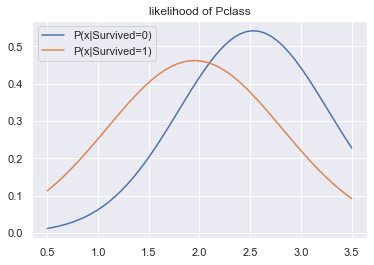

In [92]:
x = np.linspace(0.5,3.5)
plot_probability(x, stats,feature='Pclass' )
plt.legend() 

We can see for a Pclass=3 or Pclass=2  most likely is 'not survived' for  Pclass=1 is 'survived'.Let's include the prior knoledge $p(survived=1)$ and $p(survived=0)$

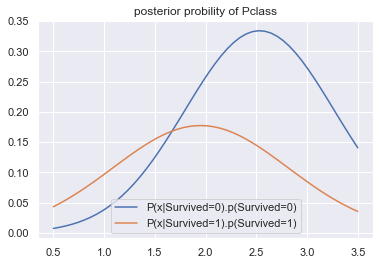

In [93]:
x = np.linspace(0.5,3.5)
plot_probability(x, stats,feature='Pclass',prior_probability=prior_prob )
plt.legend() 

Including prior probability $ p(survived=y)$ we can notice that posterior probability for $P_{class}=2$ already is bigger than just likelihood. In this way, we update our beliefs.

Let's see the same fom feature 'Sex'

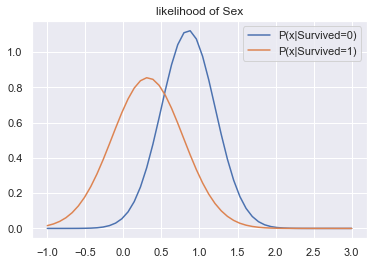

In [86]:
feature = 'Pclass'
x = np.linspace(-1,3)
plot_probability(x, stats,feature='Sex' )
plt.legend() 

In [80]:
prob[label_value]

0.3838383838383838

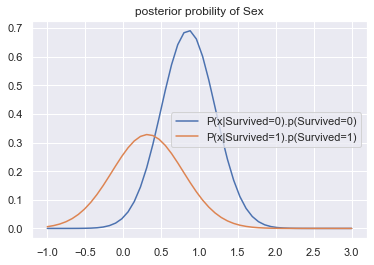

In [94]:
x = np.linspace(-1,3)
plot_probability(x, stats, feature='Sex', prior_probability=prior_prob )
plt.legend() 

<h2 id='testing'> Implementation of likelihood table for Gaussian Naive Bayes and testing on Titanic </h2>

impemetation of likelyhood table

In [96]:
stats = get_stats(train, label = label)
def likelihood_table(x, label_stats ):
    result = {}
    for label_value in label_stats:
        stats_feature = label_stats[label_value][x.name]
        sigma = stats_feature['std']
        mu = stats_feature['mean']
        likelihood = norm.pdf(x, mu, sigma)
        result[label_value] = likelihood
        
    return result   

In [97]:
result = train[['Pclass','Sex']].apply(likelihood_table, label_stats=stats)

let us make the prediction

In [98]:
not_survived = result['Pclass'][0]*result['Sex'][0]*prob[0]
survived = result['Pclass'][1]*result['Sex'][1]*prob[1]

In [99]:
predict = (survived>not_survived).astype(int)

In [100]:
accuracy_score(predict, train[label])

0.7867564534231201

We achieve 0.78 accuracy using only features Pclass Sex.Let's the accuracy of <mark> sklearn </mark> implementation

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train[['Pclass','Sex']],train['Survived'])
predict = gnb.predict(train[['Pclass','Sex']])
accuracy_score(predict, train[label])

0.7867564534231201

the result is the same !

<h2 id='bernuli'> Bernoulli Naive Bayes </h2>


BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

The decision rule for Bernoulli naive Bayes is based on
     $$ P(x_i| y) = P(i|y)x_i + (1- P(i|y))(1-x_i)$$

which differs from multinomial NB’s rule in that it explicitly penalizes the non-occurrence of a feature  that is an indicator for class , where the multinomial variant would simply ignore a non-occurring feature.

In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. BernoulliNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

<h2 id='ref'> References </h2>
* <a href='https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41'>Implementing Naive Bayes Algorithm from Scratch — Python<br>
* <a href='https://prwatech.in/blog/machine-learning/naive-bayes-classifier-in-machine-learning/'> Indian Naive Bayes </a> <br>
* <a href='https://www.geeksforgeeks.org/naive-bayes-classifiers/'>Naive Bayes Classifiers </a>     <br>
* <a href='https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c'>Naive Bayes Classifiers </a>  <br>
* <a href='https://scikit-learn.org/stable/modules/naive_bayes.html'>sklearn - Naive Bayes <a>    